* CSCE 5215 Assingment 2

Student: Dang Thai Ha - 11741833

# Q1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix


In [3]:
# Reading the CSV (adapt the file path as needed)
df = pd.read_csv("Food_delivery_times.csv") 
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


1.1 One‐Hot Encoding and Checking for Null Values

In [4]:
# Check for missing values
print(df.isnull().sum())

# Example: drop rows that have nulls (simple approach)
df = df.dropna()

# Alternatively, you might impute but here we just drop them for simplicity.

# Select only the columns we need for Q1
df_q1 = df[['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day', 'Delivery_Time_min']].copy()

# One-hot encode the categorical variables
df_q1_encoded = pd.get_dummies(df_q1, columns=['Weather', 'Traffic_Level', 'Time_of_Day'], drop_first=True)

df_q1_encoded.head()


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


,Distance_km,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night
0,7.93,43,False,False,False,True,True,False,False,False,False
1,16.42,84,False,False,False,False,False,True,True,False,False
2,9.52,59,True,False,False,False,True,False,False,False,True
3,7.44,37,False,True,False,False,False,True,False,False,False
4,19.03,68,False,False,False,False,True,False,False,True,False


1.2 Splitting into Train (70%) and Test (30%)

In [5]:
#1.2
from sklearn.model_selection import train_test_split

X = df_q1_encoded.drop('Delivery_Time_min', axis=1)
y = df_q1_encoded['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


1.3 Fit the Linear Regression Model and Report Coefficients

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:")
for col, coef in zip(X_train.columns, lin_reg.coef_):
    print(f"  {col}: {coef:.4f}")


Intercept: 31.557334629164327
Coefficients:
  Distance_km: 2.9724
  Weather_Foggy: 7.7273
  Weather_Rainy: 3.2689
  Weather_Snowy: 8.9174
  Weather_Windy: 0.9910
  Traffic_Level_Low: -12.0806
  Traffic_Level_Medium: -8.0297
  Time_of_Day_Evening: 2.0219
  Time_of_Day_Morning: 0.1459
  Time_of_Day_Night: -0.5225


1.4 Evaluate RSS, Adjusted R², and MSE


RSS = Residual Sum of Squares = Σ( yᵢ − ŷᵢ )²
MSE = Mean Squared Error = RSS / n
R² = 1 − [ (sum of squared residuals) / (total sum of squares) ]
Adjusted R² = 1 − [ (1 − R²)(n − 1) / (n − k − 1) ]
(where n = number of samples, k = number of predictors)

In [7]:
y_pred = lin_reg.predict(X_test)

# RSS
rss = np.sum(np.square(y_test - y_pred))

# MSE
mse = mean_squared_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1)/(n - k - 1)

print(f"RSS: {rss:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {r2_adj:.4f}")


RSS: 34866.83
MSE: 131.57
R-squared: 0.6887
Adjusted R-squared: 0.6764


1.5 Relationship Between Distance and Delivery Time


                   Distance_km  Delivery_Time_min
Distance_km           1.000000           0.783226
Delivery_Time_min     0.783226           1.000000


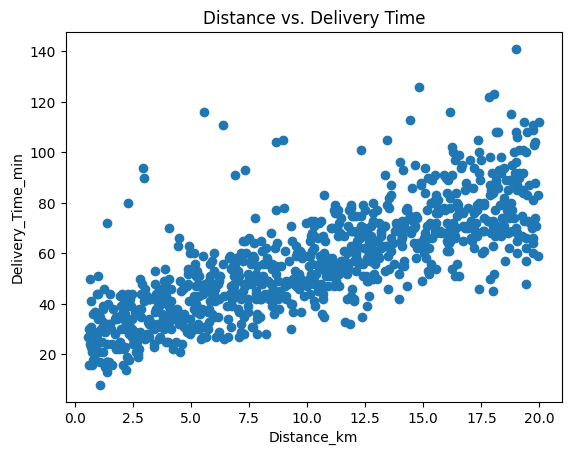

In [8]:
corr_dist_deliv = df[['Distance_km','Delivery_Time_min']].dropna().corr()
print(corr_dist_deliv)

# Or a scatter plot
plt.scatter(df['Distance_km'], df['Delivery_Time_min'])
plt.xlabel('Distance_km')
plt.ylabel('Delivery_Time_min')
plt.title('Distance vs. Delivery Time')
plt.show()


1.6 Difference Between Linear and Logistic Regression


Linear Regression:
Used for continuous target variables (e.g., predicting delivery time).
Outputs a real‐valued number and uses the least squares cost function.
Logistic Regression:
Used for binary (or multi-class) classification tasks (e.g., predicting “High vs. Low traffic”).
Outputs probabilities via the logistic (sigmoid) function and uses a likelihood‐based cost function (often cross‐entropy).

Q2: Ridge and Lasso Regression


2.1 Check for Null Values, Drop Them, and Visualize Deliveries During Different Times of Day

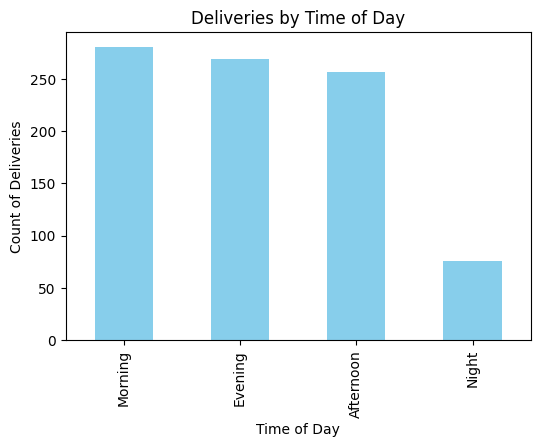

In [9]:
df_q2 = df.copy()

# Drop rows with null
df_q2 = df_q2.dropna()

# Bar chart for number of deliveries vs Time_of_Day
plt.figure(figsize=(6,4))
df_q2['Time_of_Day'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Deliveries')
plt.show()


2.2 Apply Label Encoding to Categorical Values


In [10]:
df_encoded = df_q2.copy()
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


2.3 Check for Outliers in Courier_Experience_yrs and Plot Histogram of Distance_km



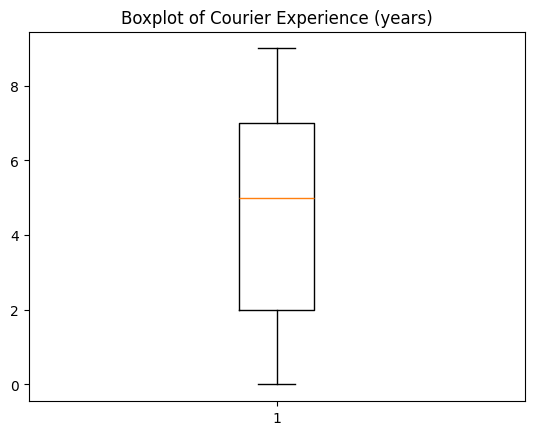

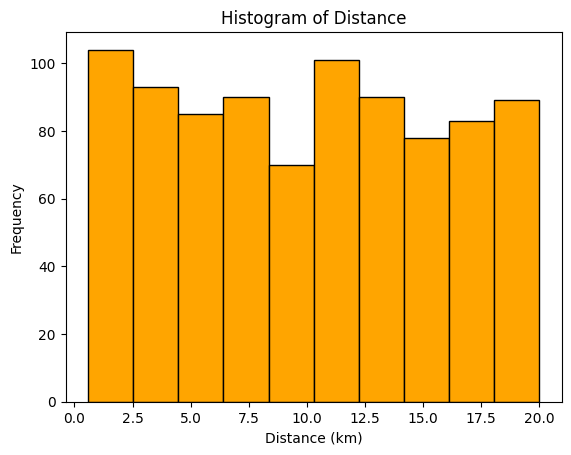

In [11]:
# Boxplot for Courier_Experience_yrs
plt.boxplot(df_encoded['Courier_Experience_yrs'])
plt.title('Boxplot of Courier Experience (years)')
plt.show()

# Histogram of Distance_km
plt.hist(df_encoded['Distance_km'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()


2.4 Split into 60% Training and 40% Testing

In [12]:
X = df_encoded.drop(['Order_ID','Delivery_Time_min'], axis=1)
y = df_encoded['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


2.5 Train Ridge and Lasso Models

In [16]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
# Ridge coefficients
print("Ridge coefficients:")
for col, coef in zip(X_train.columns, ridge_reg.coef_):
    print(f"  {col}: {coef:.4f}")
# Lasso coefficients
print("Lasso coefficients:")
for col, coef in zip(X_train.columns, lasso_reg.coef_):
    print(f"  {col}: {coef:.4f}")


Ridge coefficients:
  Distance_km: 2.9196
  Weather: 1.4432
  Traffic_Level: -3.0307
  Time_of_Day: -0.2092
  Vehicle_Type: -0.0896
  Preparation_Time_min: 0.8707
  Courier_Experience_yrs: -0.5556
Lasso coefficients:
  Distance_km: 2.9182
  Weather: 1.3995
  Traffic_Level: -2.8936
  Time_of_Day: -0.1029
  Vehicle_Type: -0.0000
  Preparation_Time_min: 0.8684
  Courier_Experience_yrs: -0.5405


2.6 Report MSE and R‐Squared for Both Models

In [17]:
# Ridge predictions
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso predictions
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge  -> MSE:", mse_ridge, "R2:", r2_ridge)
print("Lasso  -> MSE:", mse_lasso, "R2:", r2_lasso)


Ridge  -> MSE: 110.50033796663526 R2: 0.7566331286744594
Lasso  -> MSE: 110.38156223648602 R2: 0.7568947213389503


2.7 Apply Cross Validation on the Underperforming Model

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso_reg, X, y, cv=5, scoring='r2')
print("Cross-validation R2 scores:", scores)
print("Mean R2 score:", scores.mean())


Cross-validation R2 scores: [0.61762714 0.79873043 0.79490892 0.6970738  0.75162177]
Mean R2 score: 0.731992412184827


Q3: Logistic Regression to Predict Traffic Level

3.1 Label Encoding, Drop Nulls, Standard Scale Distance_km


In [19]:
df_q3 = df.copy()
df_q3 = df_q3.dropna()

X_cols = ['Distance_km', 'Weather', 'Time_of_Day', 'Vehicle_Type']
y_col = 'Traffic_Level'

# Encode the predictors
for col in ['Weather', 'Time_of_Day', 'Vehicle_Type']:
    le = LabelEncoder()
    df_q3[col] = le.fit_transform(df_q3[col].astype(str))

# Our feature set
X = df_q3[X_cols]
y = df_q3[y_col]

# Encode the target as well (if it’s categorical: Low/Medium/High, 
# you could do multi-class logistic with scikit-learn)
y = LabelEncoder().fit_transform(y)

# Standard scale Distance_km
scaler = StandardScaler()
X['Distance_km'] = scaler.fit_transform(X[['Distance_km']])

# Check
print(X.head())
print(y[:5])


   Distance_km  Weather  Time_of_Day  Vehicle_Type
0    -0.373166        4            0             2
1     1.120143        0            1             0
2    -0.093501        1            3             2
3    -0.459353        2            0             2
4     1.579216        0            2             0
[1 2 1 2 1]


C:\Users\hadan\AppData\Local\Temp\ipykernel_11400\4285116711.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Distance_km'] = scaler.fit_transform(X[['Distance_km']])


3.2 Generate a Pie Chart for Time of Day

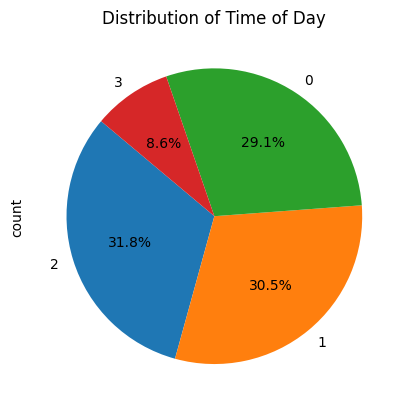

In [21]:
df_q3['Time_of_Day'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Time of Day')
plt.show()


3.3 Create a Heatmap: Correlation Between Preparation Time and Delivery Time

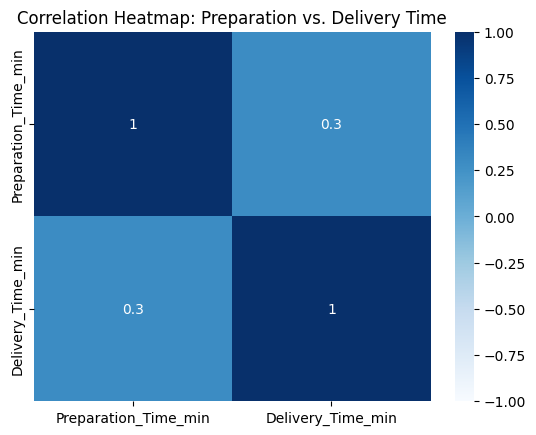

In [22]:
corr_matrix = df_q3[['Preparation_Time_min', 'Delivery_Time_min']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Preparation vs. Delivery Time')
plt.show()


3.4 Split into 70% Training and 30% Testing, Train Logistic Regression, Evaluate

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

log_reg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)


c:\Users\hadan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.37358490566037733
Precision: 0.2526654870468672
Recall: 0.31727531727531727
AUC: 0.4835108746468471


c:\Users\hadan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


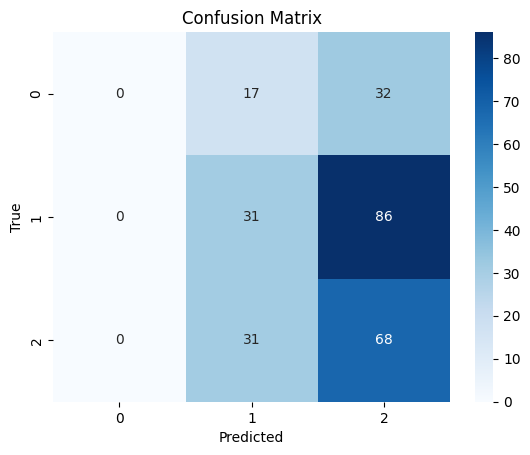

In [28]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')   # macro for multi-class
rec = recall_score(y_test, y_pred, average='macro')

# For AUC in a multi-class scenario, we often use "roc_auc_score" with multi_class='ovr' or 'ovo'
y_proba = log_reg.predict_proba(X_test)
auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("AUC:", auc)

# Confusion matrix to see classification breakdown
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


3.5 Discuss Significance of Predictors (via p‐values)


In [30]:
import statsmodels.api as sm

# For statsmodels, add a constant
X_sm = sm.add_constant(X_train)
model_sm = sm.Logit(y_train, X_sm)  # For binary. For multi-class, a different approach is needed.
result_sm = model_sm.fit()
print(result_sm.summary())


ValueError: endog must be in the unit interval.

3.5 Discuss Significance of Predictors (via p‐values)


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import cross_val_score

# Load the data
df = pd.read_csv('Food_delivery_times.csv')

# Q1: Linear Regression Model
# Check and remove null values
print("Null values:\n", df.isnull().sum())
df = df.dropna()

# One-hot encoding
categorical_cols = ['Weather', 'Traffic_Level', 'Time_of_Day']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Features and target
X = df_encoded[['Distance_km'] + list(encoded_cols.columns)]
y = df_encoded['Delivery_Time_min']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Coefficients
print("\nQ1 - Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

# Model evaluation
y_pred = lr_model.predict(X_test)
rss = np.sum((y_test - y_pred) ** 2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

print("\nModel Evaluation:")
print(f"RSS: {rss:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

# Distance vs Delivery Time relationship
correlation = df['Distance_km'].corr(df['Delivery_Time_min'])
print(f"\nCorrelation between Distance and Delivery Time: {correlation:.4f}")

# Linear vs Logistic difference
print("\nLinear vs Logistic Regression:")
print("Linear Regression predicts continuous values, while Logistic Regression predicts categorical outcomes.")

# Q2: Ridge and Lasso Regression
# Prepare data
df_q2 = df.dropna()
plt.figure(figsize=(10,6))
df_q2['Time_of_Day'].value_counts().plot(kind='bar')
plt.title('Deliveries by Time of Day')
plt.show()

# Label encoding
le = LabelEncoder()
for col in ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']:
    df_q2[col] = le.fit_transform(df_q2[col])

# Check outliers and histogram
print("\nCourier Experience Outliers:")
z_scores = stats.zscore(df_q2['Courier_Experience_yrs'])
outliers = df_q2[abs(z_scores) > 3]
print(outliers)

plt.figure(figsize=(10,6))
plt.hist(df_q2['Distance_km'], bins=20)
plt.title('Distance Distribution')
plt.show()

# Prepare features
X_q2 = df_q2.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y_q2 = df_q2['Delivery_Time_min']
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_q2, y_q2, test_size=0.4, random_state=42)

# Ridge and Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
ridge.fit(X_train_q2, y_train_q2)
lasso.fit(X_train_q2, y_train_q2)

# Evaluation
ridge_pred = ridge.predict(X_test_q2)
lasso_pred = lasso.predict(X_test_q2)

print("\nRidge Results:")
print(f"MSE: {mean_squared_error(y_test_q2, ridge_pred):.4f}")
print(f"R-squared: {r2_score(y_test_q2, ridge_pred):.4f}")

print("\nLasso Results:")
print(f"MSE: {mean_squared_error(y_test_q2, lasso_pred):.4f}")
print(f"R-squared: {r2_score(y_test_q2, lasso_pred):.4f}")

# Cross validation on worse performing model (assuming Lasso performs worse)
lasso_cv_scores = cross_val_score(lasso, X_q2, y_q2, cv=5)
print("\nLasso Cross-validation scores:", lasso_cv_scores)
print(f"Average CV score: {lasso_cv_scores.mean():.4f}")

# Q3: Logistic Regression
df_q3 = df.dropna()
# Label encoding
for col in ['Weather', 'Time_of_Day', 'Vehicle_Type', 'Traffic_Level']:
    df_q3[col] = le.fit_transform(df_q3[col])

# Pie chart
plt.figure(figsize=(8,8))
df_q3['Time_of_Day'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time of Day Distribution')
plt.show()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_q3[['Preparation_Time_min', 'Delivery_Time_min']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Prepare data
X_q3 = df_q3[['Distance_km', 'Weather', 'Time_of_Day', 'Vehicle_Type']]
y_q3 = df_q3['Traffic_Level']
scaler = StandardScaler()
X_q3['Distance_km'] = scaler.fit_transform(X_q3[['Distance_km']])

X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_q3, y_q3, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train_q3, y_train_q3)
y_pred_q3 = log_reg.predict(X_test_q3)

# Evaluation
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test_q3, y_pred_q3):.4f}")
print(f"Precision: {precision_score(y_test_q3, y_pred_q3, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_q3, y_pred_q3, average='weighted'):.4f}")
# For AUC with multiclass, we need one-vs-rest approach
y_prob_q3 = log_reg.predict_proba(X_test_q3)
auc = roc_auc_score(y_test_q3, y_prob_q3, multi_class='ovr')
print(f"AUC: {auc:.4f}")

# For p-values, we'll use statsmodels
import statsmodels.api as sm
X_train_q3_sm = sm.add_constant(X_train_q3)
logit_model = sm.MNLogit(y_train_q3, X_train_q3_sm)
result = logit_model.fit()
print("\nP-values for predictors:")
print(result.summary())

Null values:
 Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [3]:
data_path = 'Food_Delivery_Times.csv'
df = pd.read_csv(data_path)
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
# check for missing values
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
df.nunique()

Order_ID                  883
Distance_km               710
Weather                     5
Traffic_Level               3
Time_of_Day                 4
Vehicle_Type                3
Preparation_Time_min       25
Courier_Experience_yrs     10
Delivery_Time_min         106
dtype: int64

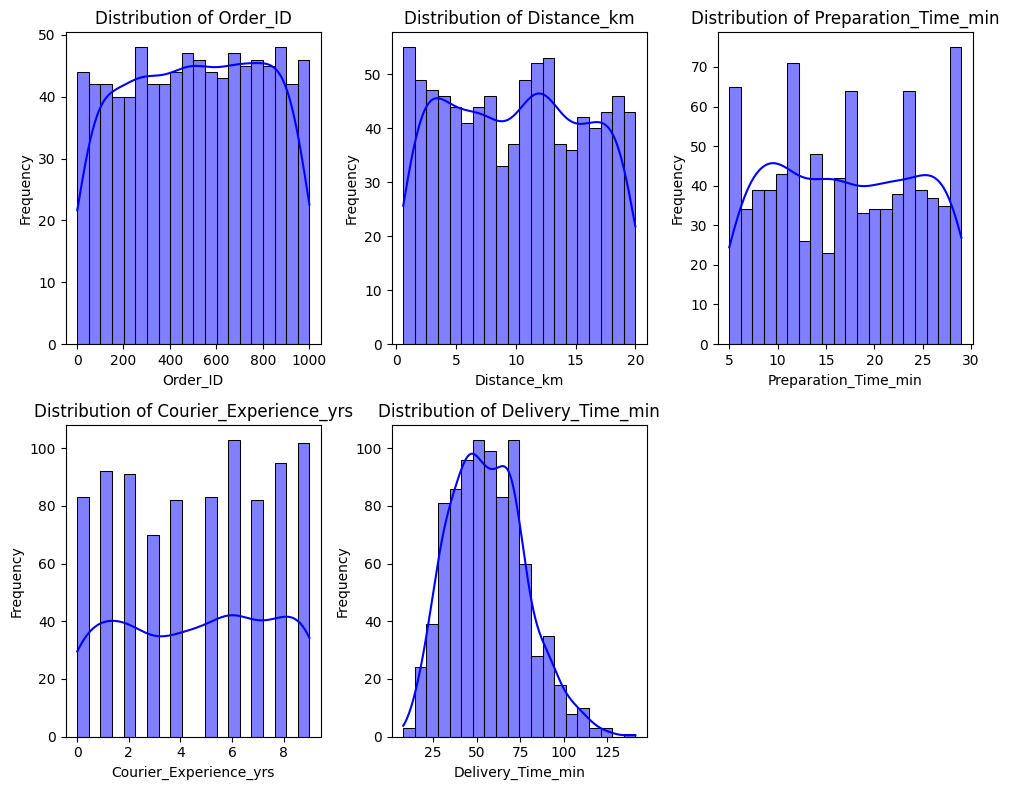

In [8]:
# create the distribution plot
cont = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(10,8))
for i, col in enumerate(cont, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

C:\Users\hadan\AppData\Local\Temp\ipykernel_20084\1825003409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Courier_Experience_yrs',y='Delivery_Time_min',palette='plasma')


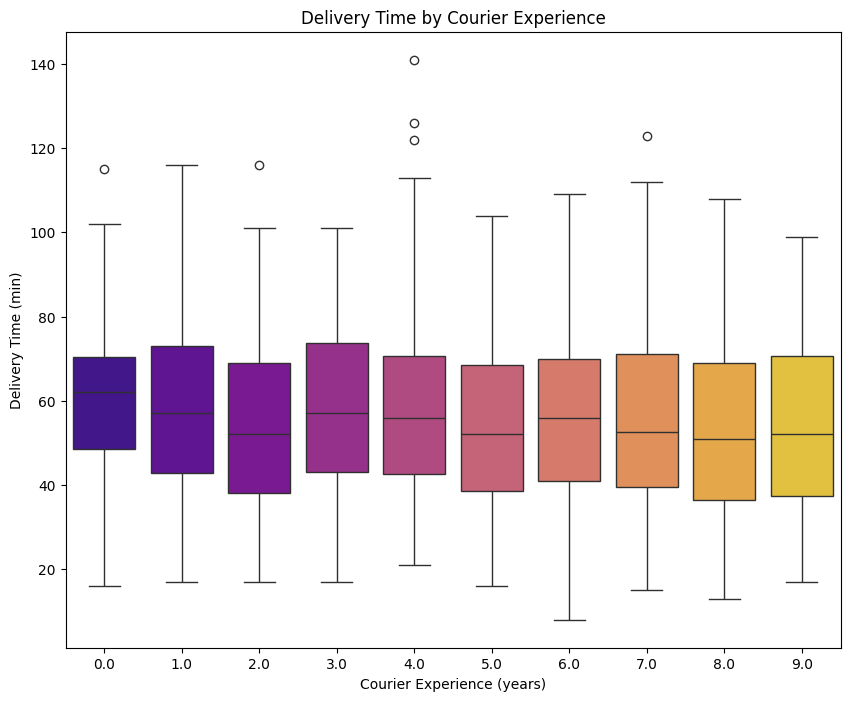

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Courier_Experience_yrs',y='Delivery_Time_min',palette='plasma')
plt.title("Delivery Time by Courier Experience")
plt.xlabel("Courier Experience (years)")
plt.ylabel("Delivery Time (min)")
plt.show()

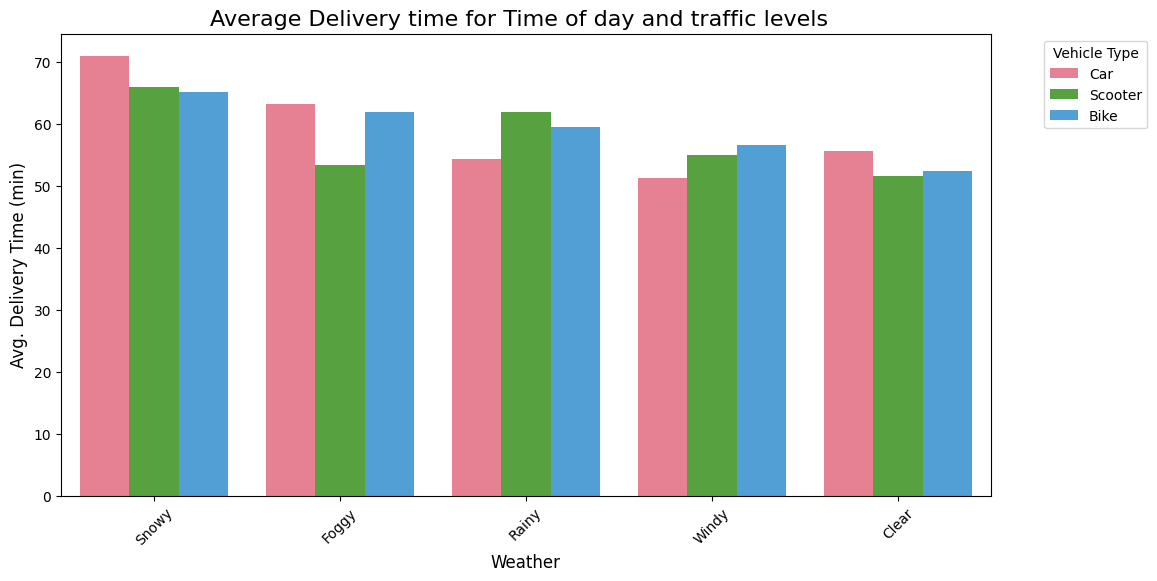

In [10]:
g1=df.groupby(['Weather','Vehicle_Type'])['Delivery_Time_min'].mean().reset_index().sort_values(by='Delivery_Time_min',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=g1,x='Weather',y='Delivery_Time_min',hue='Vehicle_Type',palette='husl')
ax.set_title('Average Delivery time for Time of day and traffic levels  ', fontsize=16)
ax.set_xlabel('Weather', fontsize=12)
ax.set_ylabel('Avg. Delivery Time (min)', fontsize=12)
ax.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Afternoon'),
  Text(1, 0, 'Evening'),
  Text(2, 0, 'Morning'),
  Text(3, 0, 'Night')])

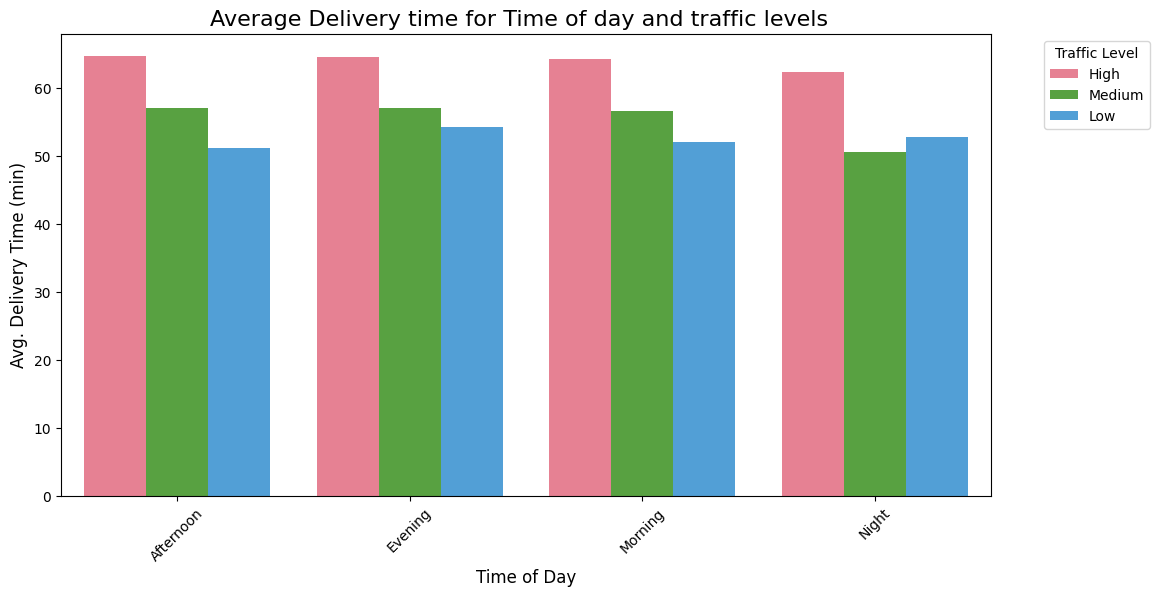

In [11]:

g2=df.groupby(['Traffic_Level','Time_of_Day'])['Delivery_Time_min'].mean().reset_index().sort_values(by='Delivery_Time_min',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=g2,x='Time_of_Day',y='Delivery_Time_min',hue='Traffic_Level',palette='husl')
ax.set_title('Average Delivery time for Time of day and traffic levels  ', fontsize=16)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Avg. Delivery Time (min)', fontsize=12)
ax.legend(title='Traffic Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

In [12]:
cat = df.select_dtypes(include=['object', 'category']).columns
def dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],dtype=int,prefix=col)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(labels=col, axis=1)
    return df

df = dummies(df,cols=cat)

In [13]:
X = df.drop('Delivery_Time_min',axis=1)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape)

(706, 19) (177, 19)


In [14]:
scalar = StandardScaler()

scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [15]:
import pickle 
pickle.dump(scalar,open('scaling.pkl','wb'))


In [16]:
print(X_train.head())


   Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
0 -1.653070    -0.669657              0.125871               -0.891439   
1 -1.200050    -1.075507              0.812618               -0.891439   
2 -0.608702    -0.085586              0.675269                0.814132   
3  0.086391    -1.273138              0.812618               -1.232553   
4  0.691571    -0.517905             -0.423526                0.814132   

   Weather_Clear  Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Windy  \
0       1.049376      -0.347325      -0.525997      -0.336994       -0.32912   
1      -0.952947      -0.347325       1.901152      -0.336994       -0.32912   
2       1.049376      -0.347325      -0.525997      -0.336994       -0.32912   
3      -0.952947      -0.347325       1.901152      -0.336994       -0.32912   
4       1.049376      -0.347325      -0.525997      -0.336994       -0.32912   

   Traffic_Level_High  Traffic_Level_Low  Traffic_Level_Medium  \
0       

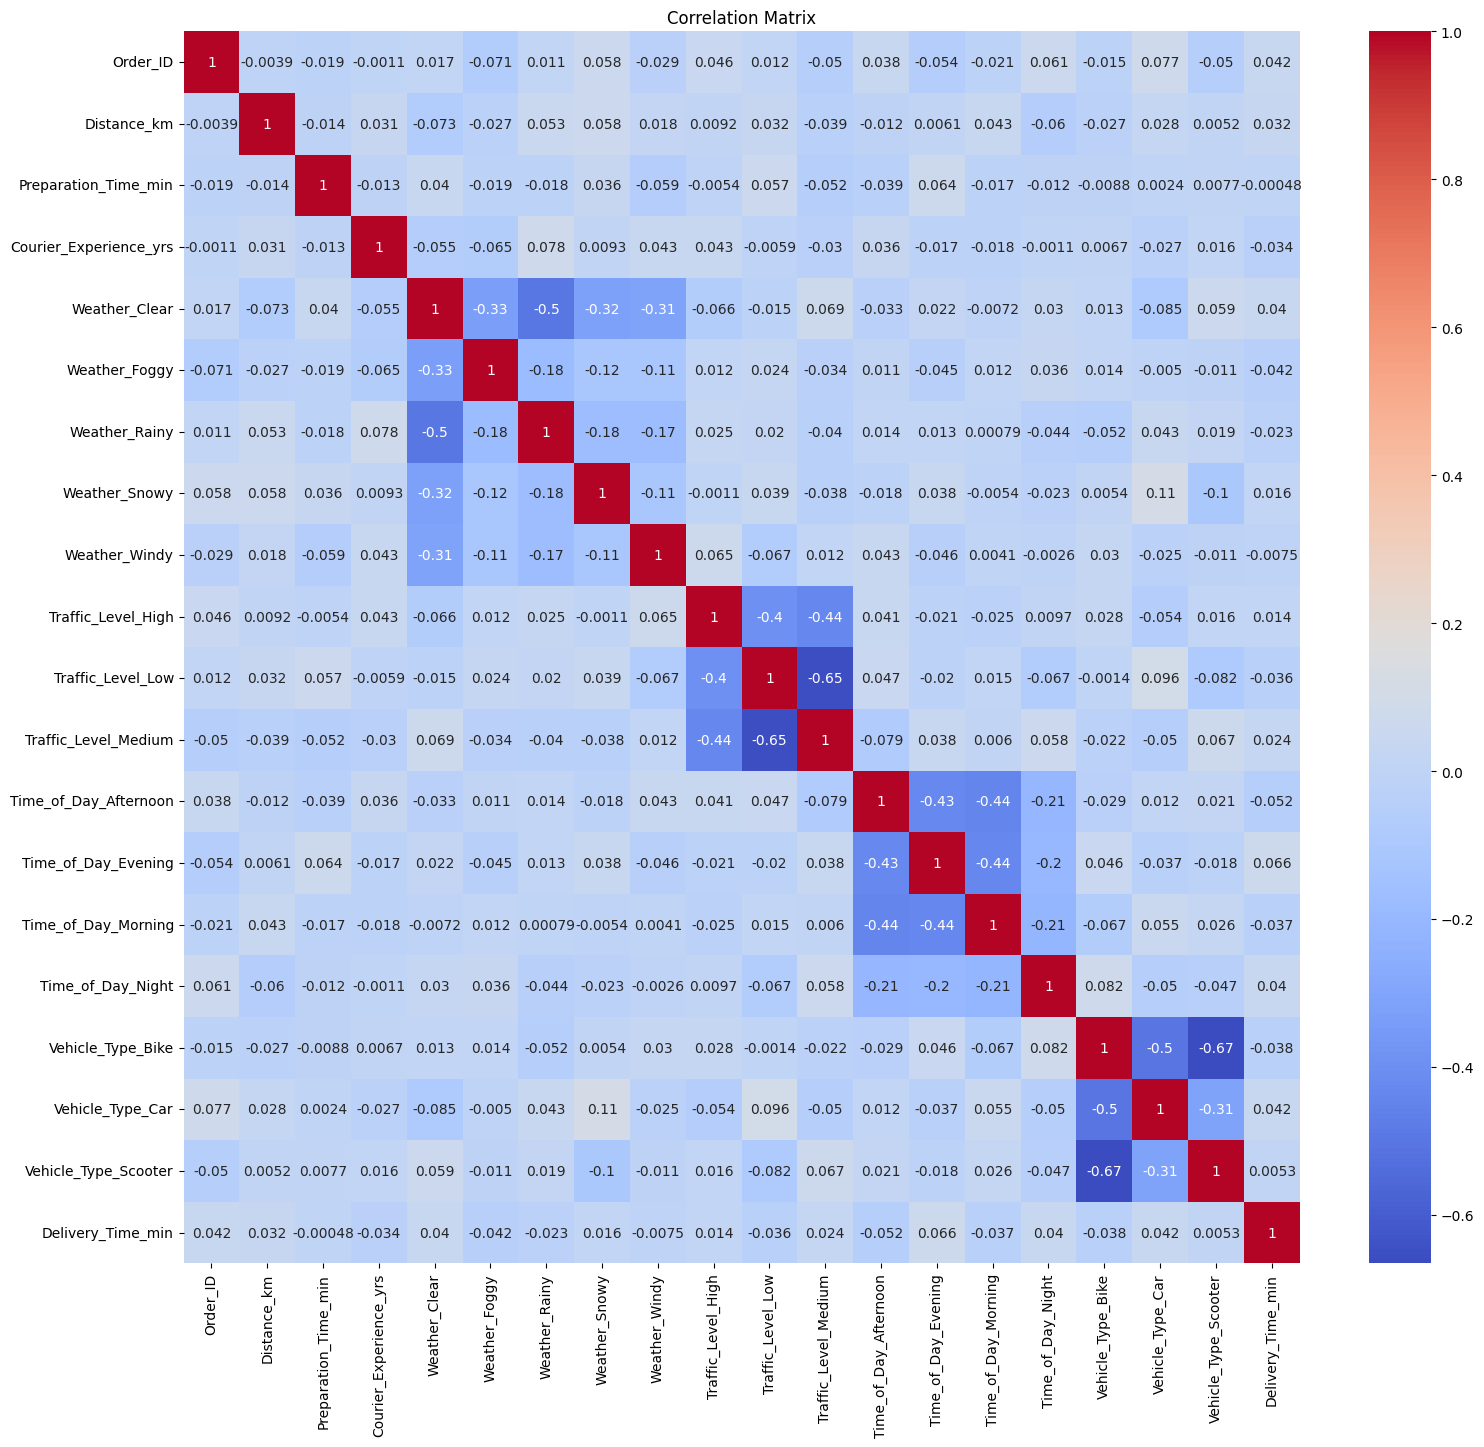

In [17]:
data_copy = pd.concat([X_train,y_train],axis=1)
corr = data_copy.corr()

fig, ax = plt.subplots(figsize=(18,16))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()